In [1]:
## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

In [5]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


In [ ]:
5. How many rows and columns are in `gdp_df`? What are the data types of each column?

8219 rows, 4 columns, dtypes: float64(2), int64(1), object(1)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.drop('Value Footnotes', axis=1)

In [18]:
print(gdp_df.columns)


Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')


In [19]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

228 countries have data for all years.

Countries missing many years of data: 
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30


The missing data for Afghanistan in the 1990s likely reflects the chaotic and war-torn conditions was experiencing during that time. 

In [20]:
print(gdp_df["Country"].value_counts())

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64


In [22]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()

In [24]:
countries_with_all_years = country_year_counts[country_year_counts == total_years]

In [25]:
print("Countries with data for all years:\n", countries_with_all_years)

Countries with data for all years:
 Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


In [31]:
countries_with_all_years_df = countries_with_all_years.reset_index()

print("Countries with data for all years:")
print(countries_with_all_years_df)

Countries with data for all years:
                         Country  Year
0    Africa Eastern and Southern    34
1     Africa Western and Central    34
2                        Albania    34
3                        Algeria    34
4                        Andorra    34
..                           ...   ...
223                      Vanuatu    34
224                     Viet Nam    34
225                        World    34
226                       Zambia    34
227                     Zimbabwe    34

[228 rows x 2 columns]


In [32]:
countries_missing_years = country_year_counts[country_year_counts < total_years]
print("Countries missing many years of data:\n", countries_missing_years)

Countries missing many years of data:
 Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64


In [33]:
observations_per_year = gdp_df.groupby('Year').size()
print("Number of observations per year:\n", observations_per_year)

Number of observations per year:
 Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
dtype: int64


In [34]:
import matplotlib.pyplot as plt

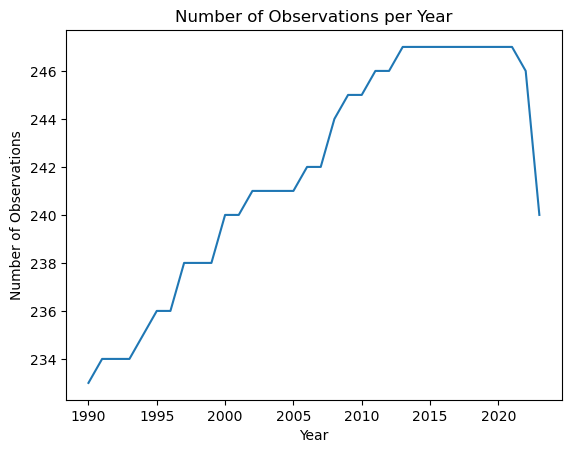

In [35]:
plt.plot(observations_per_year.index, observations_per_year.values)
plt.title('Number of Observations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.show()

In [37]:
afghanistan_years = gdp_df[gdp_df['Country'] == 'Afghanistan']['Year'].unique()
missing_years_afghanistan = set(range(1990, 2023)) - set(afghanistan_years)
print("Missing years for Afghanistan:", missing_years_afghanistan)

Missing years for Afghanistan: {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999}


In [39]:
west_bank_and_gaza_years = gdp_df[gdp_df['Country'] == 'West Bank and Gaza']['Year'].unique()
missing_years_west_bank_and_gaza = set(range(1990, 2023)) - set(west_bank_and_gaza_years)
print("Missing years for West Bank and Gaza:", missing_years_west_bank_and_gaza)

Missing years for West Bank and Gaza: {1992, 1993, 1990, 1991}


In [40]:
djibouti_years = gdp_df[gdp_df['Country'] == 'Djibouti']['Year'].unique()
missing_years_djibouti = set(range(1990, 2023)) - set(djibouti_years)
print("Missing years for Djibouti:", missing_years_djibouti)

Missing years for Djibouti: {1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012}


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


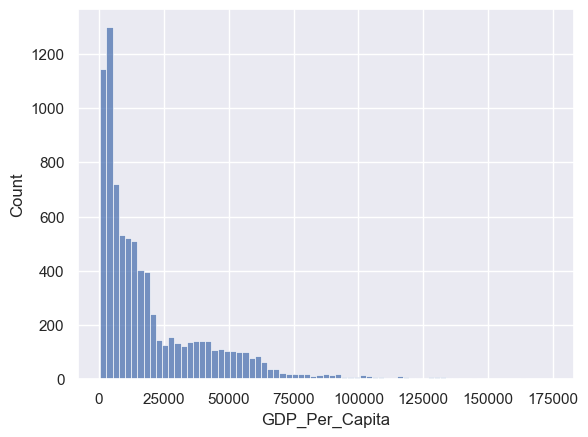

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.set_theme(style="darkgrid")


sns.histplot(data=gdp_df, x="GDP_Per_Capita")
plt.show()

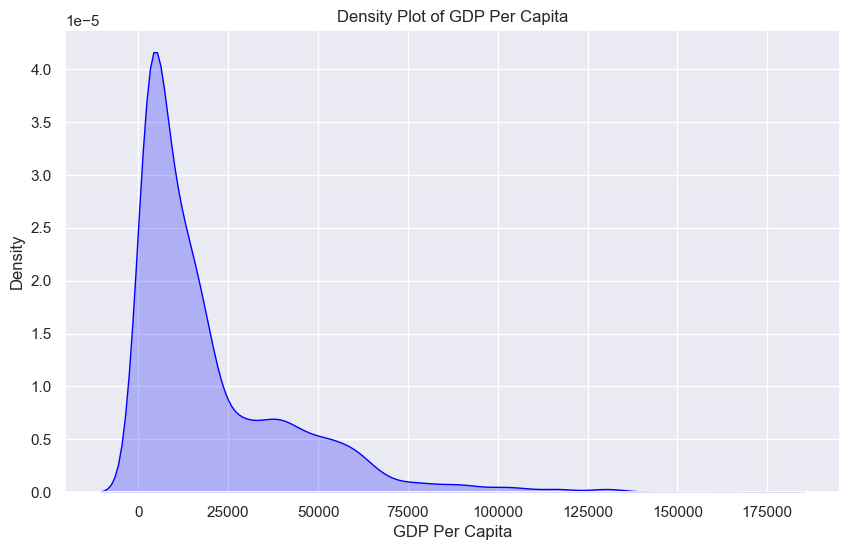

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=gdp_df, x="GDP_Per_Capita", fill=True, color='blue')

plt.title('Density Plot of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Density')
plt.show()

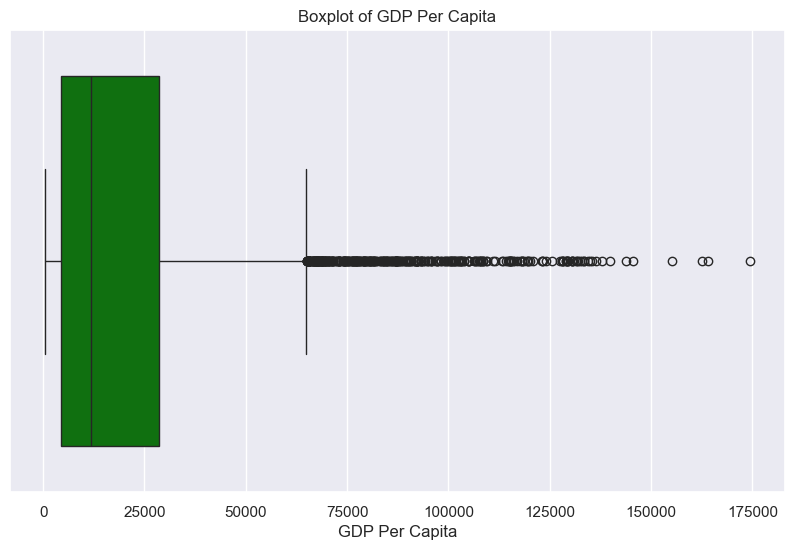

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=gdp_df['GDP_Per_Capita'], color='green')

plt.title('Boxplot of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.show()

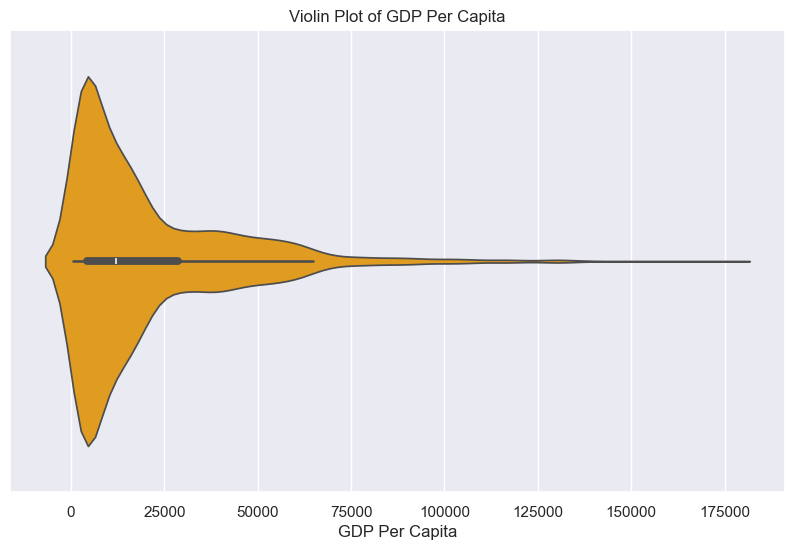

In [49]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=gdp_df['GDP_Per_Capita'], color='orange')

plt.title('Violin Plot of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.show()